In [1]:
import pandas as pd
import math
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
train_df = pd.read_csv("train_postprocess.csv")

test_df = pd.read_csv("test_postprocess.csv")

In [3]:
train_df

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Converting categorical features

In [4]:
test_PassengerId = test_df["PassengerId"]

In [5]:
train_df = train_df.drop(['Unnamed: 0','PassengerId','Name'],axis=1)

test_df = test_df.drop(['Unnamed: 0','PassengerId','Name'],axis=1)

In [6]:
train_df[['deck', 'num','side']] = train_df['Cabin'].str.split('/', expand=True)
train_df = train_df.drop(['Cabin'],axis=1)

test_df[['deck', 'num','side']] = test_df['Cabin'].str.split('/', expand=True)
test_df = test_df.drop(['Cabin'],axis=1)

In [7]:
train_df['deck'] = train_df['deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})

test_df['deck'] = test_df['deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})

In [8]:
train_df['num'] = train_df['num'].astype(float)

test_df['num'] = test_df['num'].astype(float)

In [9]:
train_df['side'] = train_df['side'].replace({'P':0, 'S':1})

test_df['side'] = test_df['deck'].replace({'P':0, 'S':1})

In [10]:
train_df['HomePlanet'] = train_df['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':2})

test_df['HomePlanet'] = test_df['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':2})

In [11]:
train_df['Destination'] = train_df['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})

test_df['Destination'] = test_df['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})

In [12]:
bool_columns = ['CryoSleep', 'VIP','Transported']

for i in range(len(train_df)):
    for j in bool_columns:
        if not math.isnan(train_df[j][i]):
            train_df[j][i] = int(train_df[j][i])


C:\Users\Juliana\AppData\Local\Temp\ipykernel_19800\2871881640.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[j][i] = int(train_df[j][i])


In [13]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0.0,0,0.0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0
1,1.0,0,0.0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5.0,0.0,1.0
2,0.0,0,0.0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.0,0.0,1.0
3,0.0,0,0.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,0.0,1.0
4,1.0,0,0.0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0,2.0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0.0,98.0,0.0
8689,1.0,1,1.0,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6.0,1499.0,1.0
8690,1.0,0,0.0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6.0,1500.0,1.0
8691,0.0,0,2.0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4.0,608.0,1.0


### Missing values

In [14]:
def categorical_missing_values(column):
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)
    
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'num', 'side']

for i in categorical_columns:
    categorical_missing_values(i)

In [15]:
def numerical_missing_values(column):
    train_df[column].fillna(train_df[column].mean(), inplace=True)
    test_df[column].fillna(test_df[column].mean(), inplace=True)

numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i in numerical_columns:
    numerical_missing_values(i)

## Model

In [16]:
X = train_df.drop('Transported', axis=1)
Y = train_df['Transported']
Y=Y.astype('int')

feature_names = X.columns
labels = Y.unique()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=41)

In [18]:
clf = DecisionTreeClassifier(max_depth=7, random_state=40, min_samples_leaf=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15, random_state=40)

In [19]:
from sklearn.tree import export_text

tree_rules = export_text(clf,feature_names = list(feature_names))

print(tree_rules)

|--- CryoSleep <= 0.50
|   |--- Age <= 12.50
|   |   |--- deck <= 5.50
|   |   |   |--- num <= 86.00
|   |   |   |   |--- class: 1
|   |   |   |--- num >  86.00
|   |   |   |   |--- num <= 1283.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- num >  1283.50
|   |   |   |   |   |--- class: 1
|   |   |--- deck >  5.50
|   |   |   |--- num <= 764.00
|   |   |   |   |--- Age <= 1.50
|   |   |   |   |   |--- num <= 289.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- num >  289.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  1.50
|   |   |   |   |   |--- num <= 633.00
|   |   |   |   |   |   |--- num <= 463.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num >  463.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- num >  633.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- num >  764.00
|   |   |   |   |--- Destination <= 0.50
|   |   |   |   |   |--- num <= 1290.50
|   |   |   |   |   |   

In [20]:
test_pred_decision_tree = clf.predict(X_test)

acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
acc_decision_tree

81.31

In [21]:
score = accuracy_score(y_test, test_pred_decision_tree)*100
score

76.8021472392638

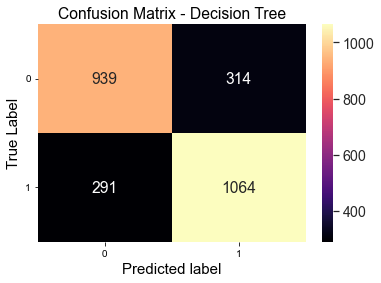

<Figure size 720x504 with 0 Axes>

In [22]:
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test,  test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)

# ax.set_xticklabels(['']+labels)

ax.set_ylabel("True Label", fontsize=15)

ax.set_yticklabels(list(labels), rotation = 0)

plt.show()

## Prediction

In [23]:
final_pred_decision_tree = clf.predict(test_df)
final_pred_decision_tree = [bool (x) for x in final_pred_decision_tree]

In [24]:
final_df = pd.DataFrame({'PassengerId': test_PassengerId, 'Transported': final_pred_decision_tree})
final_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
